# Assignment 

Name :- Niraj Patil


Roll no :- DS5B 2021


# Package Install


In [231]:
!pip install nltk

In [232]:
!pip install wordcloud

In [233]:
#Import Libraries

import nltk
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
import numpy as np
import re
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from nltk.stem.porter import PorterStemmer
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingRegressor,ExtraTreesClassifier,GradientBoostingClassifier


In [234]:
#Imort data sets
data = pd.read_csv("C:\\Users\\Admin\\Desktop\\Datasets\\GrammarandProductReviews.csv")
data.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


# EDA

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
id                      71044 non-null object
brand                   71044 non-null object
categories              71044 non-null object
dateAdded               71044 non-null object
dateUpdated             71044 non-null object
ean                     39065 non-null object
keys                    71044 non-null object
manufacturer            70903 non-null object
manufacturerNumber      70841 non-null object
name                    71044 non-null object
reviews.date            70977 non-null object
reviews.dateAdded       71044 non-null object
reviews.dateSeen        71044 non-null object
reviews.didPurchase     32158 non-null object
reviews.doRecommend     60429 non-null object
reviews.id              32158 non-null float64
reviews.numHelpful      32508 non-null float64
reviews.rating          71044 non-null int64
reviews.sourceURLs      71044 non-null object
reviews.text    

In [236]:
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,3.215800e+04,32508.000000,71044.000000
mean,7.944753e+07,0.410422,4.385747
std,4.842696e+07,3.574442,1.067659
min,2.187400e+04,0.000000,1.000000
25%,3.355342e+07,0.000000,4.000000
50%,7.124763e+07,0.000000,5.000000
75%,1.112628e+08,0.000000,5.000000
max,1.038227e+09,183.000000,5.000000


In [237]:
data.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc'],
      dtype='object')

In [238]:
data.shape

(71044, 25)

In [239]:
# Finding the null values.
print(data.isnull().sum())

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64


In [240]:
#Droping Null values

df = data.dropna(subset=['reviews.text'], inplace=True)
print(data.isnull().sum())


id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31977
keys                        0
manufacturer              141
manufacturerNumber        202
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38852
reviews.doRecommend     10581
reviews.id              38852
reviews.numHelpful      38502
reviews.rating              0
reviews.sourceURLs          0
reviews.text                0
reviews.title             464
reviews.userCity        65598
reviews.userProvince    70559
reviews.username           96
upc                         2
dtype: int64


In [241]:
data.shape

(71008, 25)

In [242]:
data['brand'].value_counts().iloc[:25]

Clorox                  10700
Universal Home Video     6178
Tide                     5384
FOX                      4498
Disney                   3692
Olay                     3420
Warner Home Video        3330
L'Oreal Paris            2683
L'oreal Paris            2288
Sony Pictures            2161
Rubbermaid               1939
Warner Bros.             1920
Quilted Northern         1439
Lionsgate                1351
Burt's Bees               965
Summit Entertainment      821
Nexxus                    773
Maybelline                742
Pantene                   655
Foodsaver                 587
Head & Shoulders          565
Kiss                      562
Aveeno                    442
Lundberg                  426
Lemi Shine                423
Name: brand, dtype: int64

# Visuaization

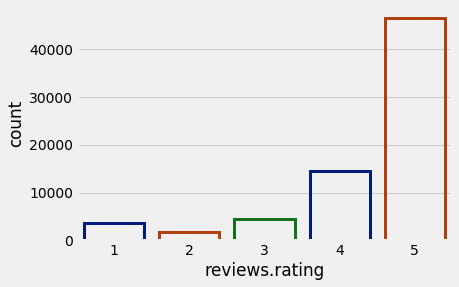

In [243]:
sns.countplot(data['reviews.rating'], facecolor=(0, 0, 0, 0), linewidth=3,edgecolor=sns.color_palette("dark", 3))
plt.show()

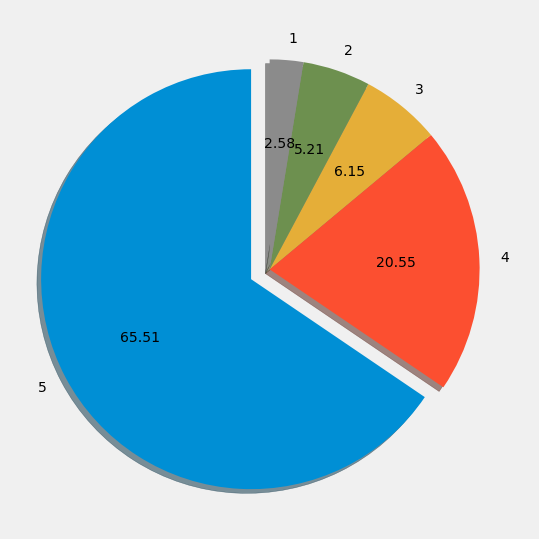

In [244]:
plt.figure(figsize=(16,9))
explode = (0.1,0,0,0,0)
plt.pie(data['reviews.rating'].value_counts(),explode=explode,labels=['5','4','3','2','1'],autopct='%0.2f',shadow=True, startangle=90)
plt.show()

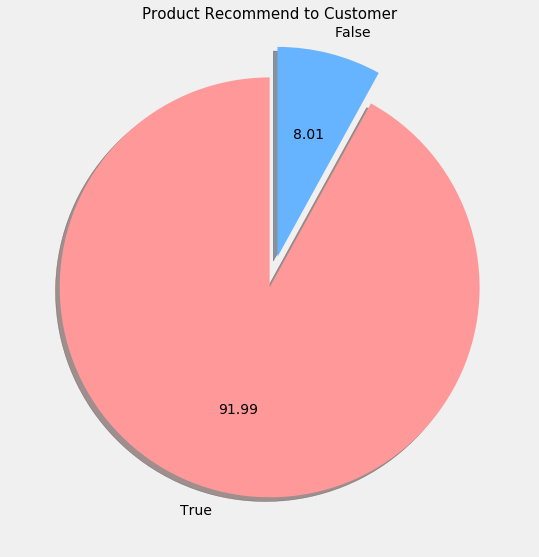

In [245]:
plt.figure(figsize=(10,9))
explode = (0, 0.15)
colors = ['#ff9999','#66b3ff']
plt.pie(data['reviews.doRecommend'].value_counts(),explode=explode,labels=['True','False'],colors=colors,autopct='%0.2f',shadow=True, startangle=90)
plt.title('Product Recommend to Customer',size=15)
plt.show()

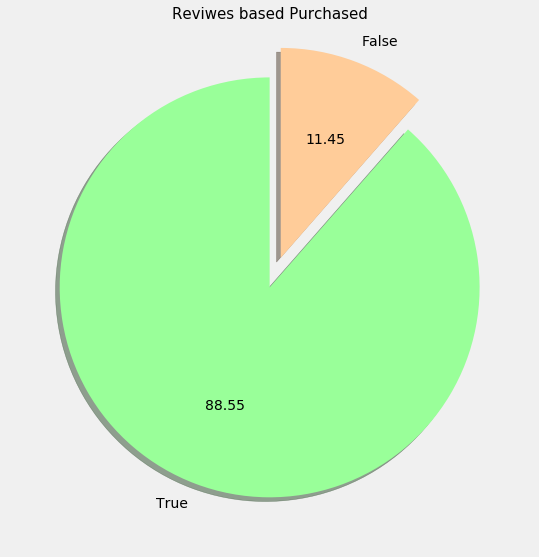

In [246]:
plt.figure(figsize=(10,9))
explode = (0, 0.15)
colors = ['#99ff99','#ffcc99']
plt.pie(data['reviews.didPurchase'].value_counts(),explode=explode,labels=['True','False'],colors=colors,autopct='%0.2f',shadow=True, startangle=90)
plt.title('Reviwes based Purchased',size=15)
plt.show()

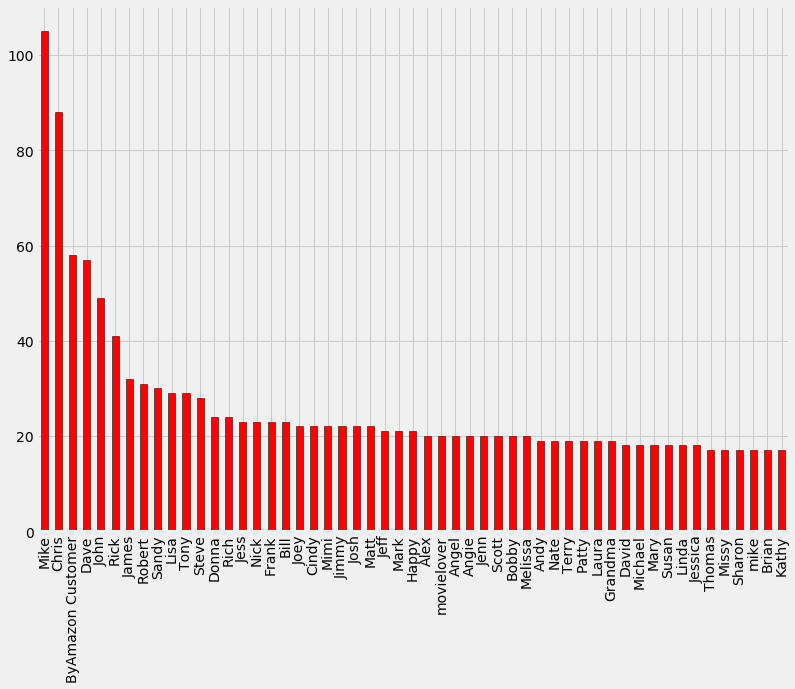

In [247]:
plt.figure(figsize=(12,9))
data['reviews.username'].value_counts().iloc[2:55].plot(kind = 'bar',color='r', edgecolor='black')
plt.show()

Text(0.5, 0, 'name')

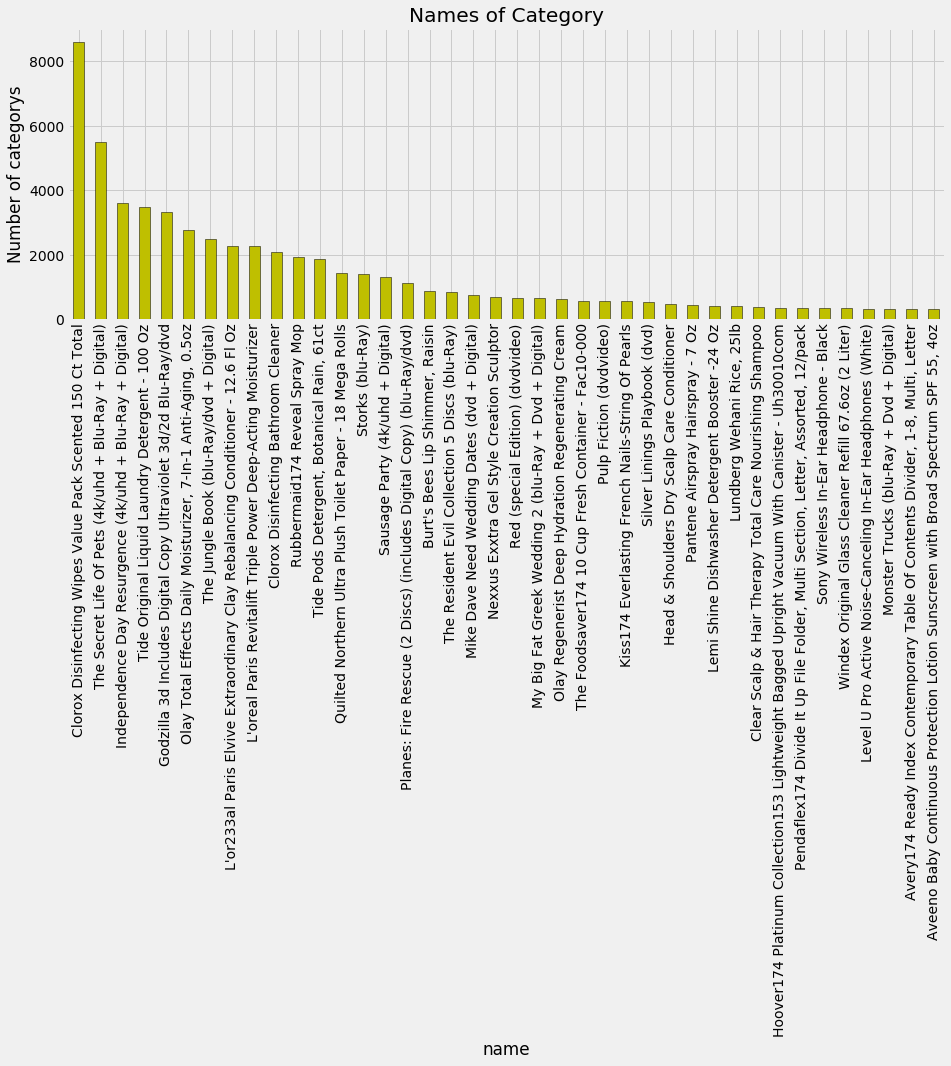

In [248]:

data.name.value_counts().nlargest(40).plot(kind='bar', figsize=(14,5),color='y', edgecolor='black')
plt.title("Names of Category")
plt.ylabel('Number of categorys')
plt.xlabel('name')

Text(0.5, 0, 'Brands')

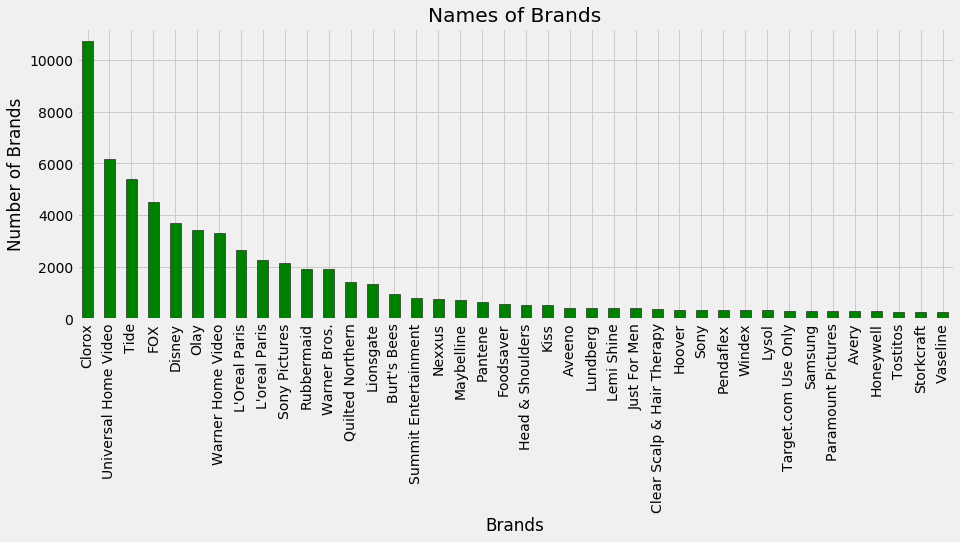

In [249]:
# Plotting a Histogram
data.brand.value_counts().nlargest(40).plot(kind='bar', figsize=(14,5),color='g', edgecolor='black')
plt.title("Names of Brands")
plt.ylabel('Number of Brands')
plt.xlabel('Brands')

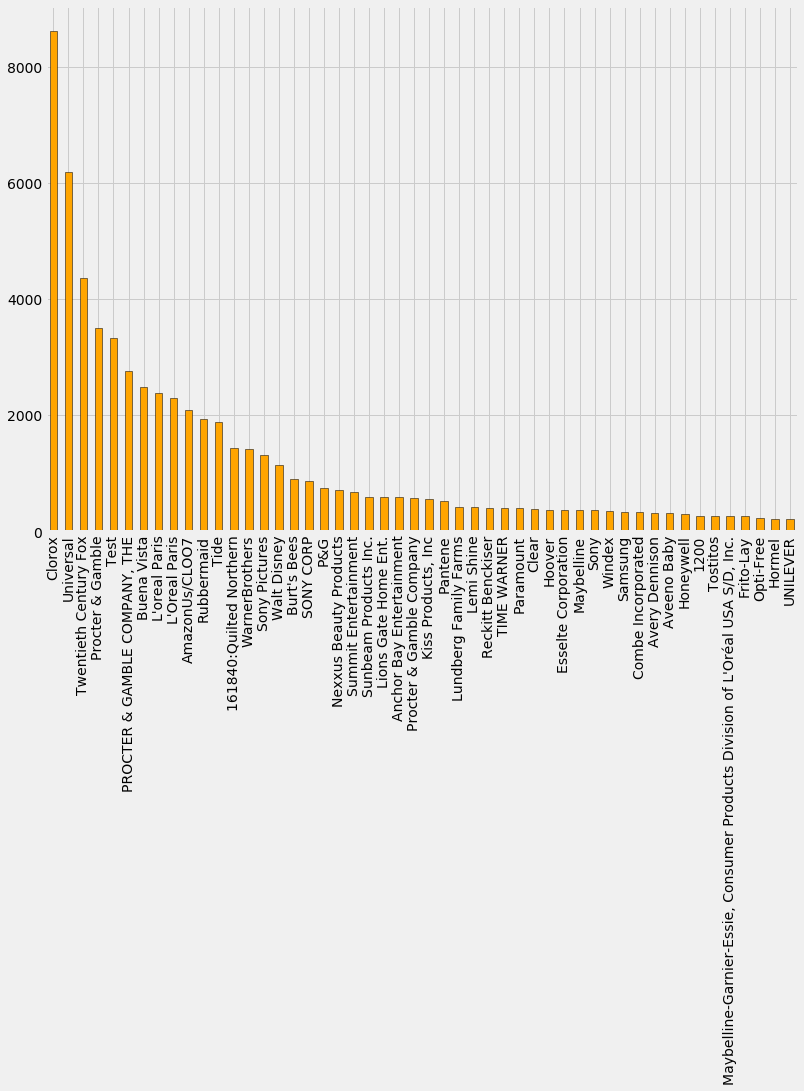

In [250]:
plt.figure(figsize=(12,9))
data['manufacturer'].value_counts().iloc[:50].plot(kind = 'bar',color='orange', edgecolor='black')
plt.show()

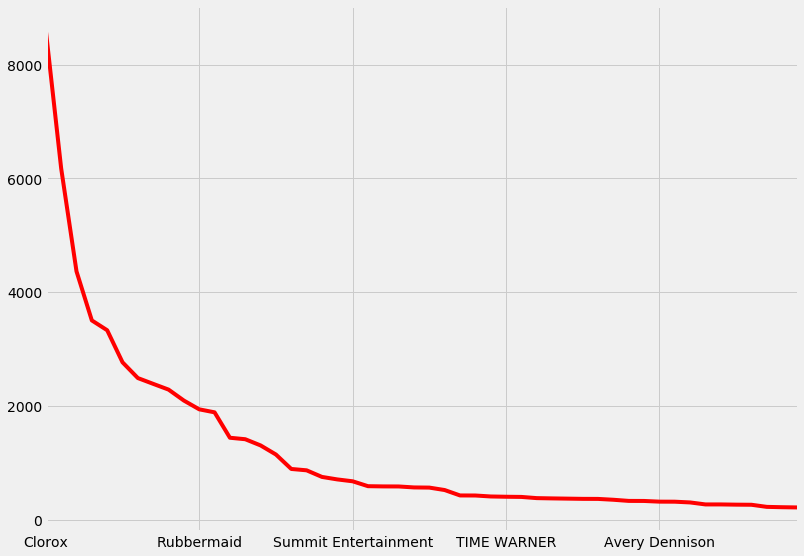

In [251]:
plt.figure(figsize=(12,9))
data['manufacturer'].value_counts().iloc[:50].plot(kind = 'line',color= 'red')
plt.show()

# Unsupervised Model on Review text

In [252]:
df = data.drop(["id","dateAdded","dateUpdated","ean","keys","manufacturerNumber","reviews.sourceURLs","upc","reviews.date","reviews.dateAdded","reviews.dateSeen"],axis=1)

In [253]:
df.head()

,brand,categories,manufacturer,name,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),NaN,NaN,NaN,0.0,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,NaN,100209113.0,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,NaN,100209113.0,NaN,5,Good flavor.,Good,NaN,NaN,Dorothy W
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,113026909.0,NaN,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,171267657.0,NaN,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557


In [254]:
 df.shape   

(71008, 14)

In [258]:
from sklearn.feature_extraction.text import CountVectorizer # Bag of words
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize)

text_counts= cv.fit_transform(data['reviews.text'])

In [91]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')



In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
df = data['reviews.text']


tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts, data['reviews.text'], test_size=0.3, random_state=123)

In [96]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, df):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(df.shape[0])[:self.k]
        self.centroids = df[initial_centroids]

        return self.centroids

In [221]:
    def assign_clusters(self, df):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(df, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, df):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([df[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids

In [222]:
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self    

In [223]:
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans


[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
     n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
     n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
     n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
     n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
     n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='

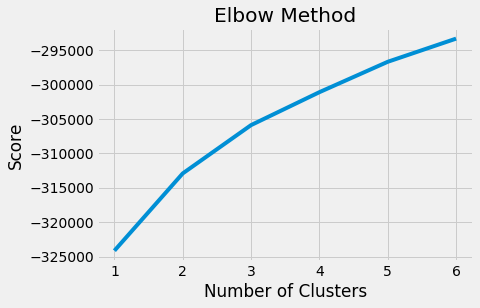

In [183]:

score = [kmeans[i].fit(X_test).score(X_test) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [ ]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(3, 1, 600)
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)


plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [197]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(X_test)
prediction = kmeans.predict(X_test)

# Supervised Model on Review Rating 

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['reviews.rating'], test_size=0.2)

In [115]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)



y_pred = classifier.predict(X_test)

print("Logistic Regression:",metrics.accuracy_score(y_test, y_pred))

Logistic Regression: 0.7203210815378116


In [116]:
dataf = pd.DataFrame({'Actual' : y_test , 'Predicted' : y_pred})
dataf.head()

,Actual,Predicted
56336,1,1
51268,5,5
25195,5,4
52494,2,3
21359,5,5


In [117]:
from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB()

clf.fit(X_train, y_train)

predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6740599915504858


In [118]:
dataf = pd.DataFrame({'Actual' : y_test , 'Predicted' : predicted})
dataf.head()

,Actual,Predicted
56336,1,1
51268,5,5
25195,5,4
52494,2,4
21359,5,5


In [119]:
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using  Random Forest classifier
classifier = RandomForestClassifier(n_estimators = 10 , criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)


predicted= classifier.predict(X_test)

print("Random Forest:",metrics.accuracy_score(y_test, predicted))

Random Forest: 0.7065906210392903


In [120]:
dataf = pd.DataFrame({'Actual' : y_test , 'Predicted' : predicted})
dataf.head()

,Actual,Predicted
56336,1,1
51268,5,5
25195,5,5
52494,2,5
21359,5,5


# Evaluting model 

Logistic Regression : Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.

Sigmoid Function :-
In order to map predicted values to probabilities, we use the Sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

step :
1. % (0.5) is asually selected because is in a middle and it has symetric

2. Any thing below this line will be projected downword on to the zero line. If your probability is less than 50% then it will zero.

3. Any thing above the harizonatal line(50%)we selected it that the it projected upwords . If the rating probability is 85% or 90% then we probability will be 1.

We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.



# Frequent word in review text


In [136]:
# Rename the columns of df2_melted: df2_tidy
df2 = df.rename(columns = {'reviews.text': 'reviewstext'}, inplace = False)
df2.head()

,brand,categories,manufacturer,name,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviewstext,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),NaN,NaN,NaN,0.0,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,NaN,100209113.0,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,NaN,100209113.0,NaN,5,Good flavor.,Good,NaN,NaN,Dorothy W
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,113026909.0,NaN,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,171267657.0,NaN,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557


In [137]:
def clean_reviewstext(reviewstext):
    """Make text lowercase, 
       remove text in angle brackets,
       remove \n,
       remove punctuation and 
       remove words containing numbers."""
    # lower case
    reviewstext = str(reviewstext).lower() 
    
    # remove text in angle brackets
    reviewstext = re.sub('<.*?>+', '', reviewstext).strip()
    
    # remove punctuation
    reviewstext = re.sub('[%s]' % re.escape(string.punctuation), '', reviewstext).strip()
    
    #remove newline character
    reviewstext = re.sub('\n', ' ', reviewstext).strip()
    
    # remove words containing numbers
    reviewstext = re.sub('\w*\d\w*', '', reviewstext).strip()
    
    return reviewstext

In [138]:
df2.head()

,brand,categories,manufacturer,name,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviewstext,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),NaN,NaN,NaN,0.0,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,NaN,100209113.0,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,NaN,100209113.0,NaN,5,Good flavor.,Good,NaN,NaN,Dorothy W
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,113026909.0,NaN,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,171267657.0,NaN,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557


In [140]:
df2['reviewstext_clean']=df2['reviewstext'].apply(lambda x:clean_reviewstext(x))

In [141]:
df2['word_length'] = df2['reviewstext'].apply(lambda x: len(str(x).split())) 

print(df2.describe())

         reviews.id  reviews.numHelpful  reviews.rating   word_length
count  3.215600e+04        32506.000000    71008.000000  71008.000000
mean   7.944794e+07            0.410447        4.385619     39.445879
std    4.842840e+07            3.574551        1.067794     42.189425
min    2.187400e+04            0.000000        1.000000      1.000000
25%    3.355246e+07            0.000000        4.000000     15.000000
50%    7.124763e+07            0.000000        5.000000     26.000000
75%    1.112628e+08            0.000000        5.000000     48.000000
max    1.038227e+09          183.000000        5.000000   1010.000000


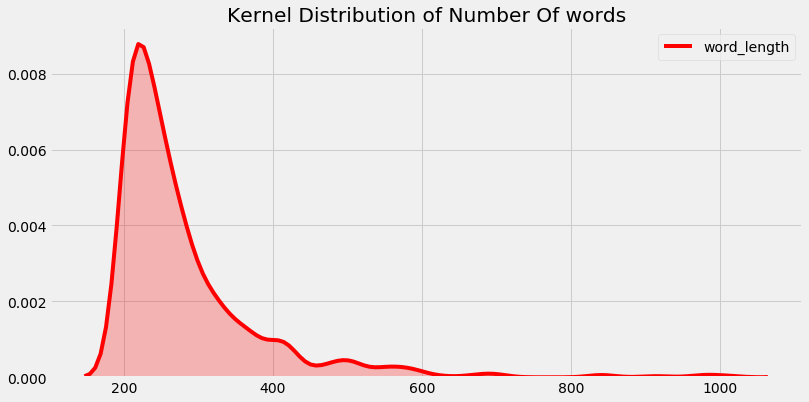

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

reviews_word_limit = df2[df2['word_length'] > 200]

plt.figure(figsize=(12,6)) 

p1=sns.kdeplot(reviews_word_limit['word_length'], shade=True, color='r').set_title("Kernel Distribution of Number Of words")

In [146]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [147]:
# Import matplotlib
import matplotlib.pyplot as plt 


def word_cloud(reviewstext):

    # Create stopword list
    stopword_list = list(STOPWORDS) + ['QTR','mln','mln dlr','dlr','dlrs'] 

    # Create WordCloud 
    word_cloud = WordCloud(width = 800, height = 800, 
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 12).generate(reviewstext) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 

    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # show plot
    plt.show()

In [148]:
low_len_df2= df2[df2['word_length'] < 60]
low_len_df2.head()

,brand,categories,manufacturer,name,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviewstext,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,reviewstext_clean,word_length
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),NaN,NaN,NaN,0.0,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,i love this album its very good more to the hi...,41
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,NaN,100209113.0,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,good flavor this review was collected as part ...,11
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,NaN,100209113.0,NaN,5,Good flavor.,Good,NaN,NaN,Dorothy W,good flavor,2
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,171267657.0,NaN,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,my husband bought this gel for us the gel caus...,25
5,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,149773828.0,NaN,1,My boyfriend and I bought this to spice things...,Not worth it,NaN,NaN,Samantha,my boyfriend and i bought this to spice things...,52


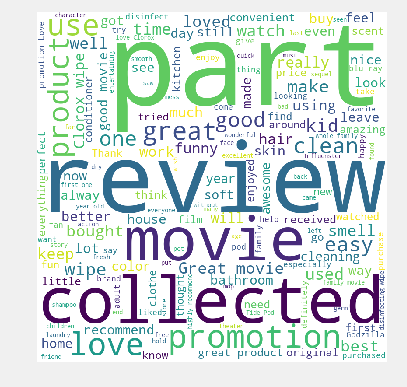

In [149]:

paragraph=' '.join(low_len_df2.reviewstext.tolist())
word_cloud(paragraph)

In [150]:
!pip install gensim

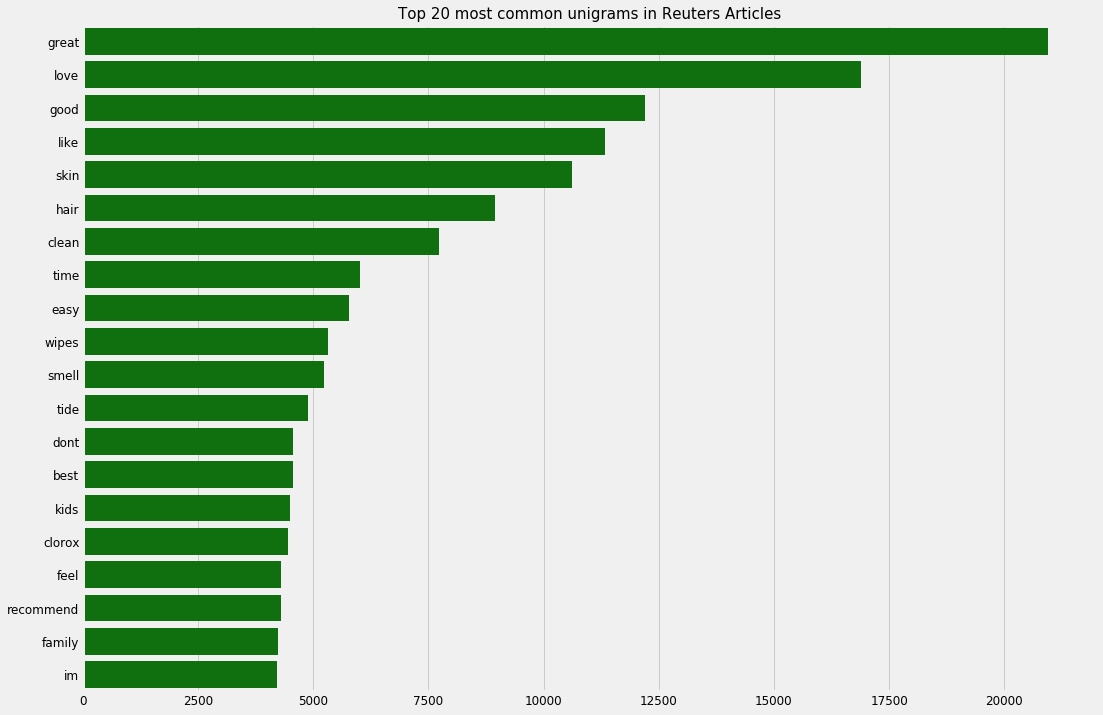

In [151]:
from gensim.parsing.preprocessing import remove_stopwords  
import gensim
from wordcloud import WordCloud
import numpy as np  
import random         

# import stopwords from gensim methods to stop_list variable
# You can also manually add stopwords
gensim_stopwords = gensim.parsing.preprocessing.STOPWORDS 

stopwords_list = list(set(gensim_stopwords))   

stopwords_update = ["product","part","promotion","collected","review","products","movie","use","I","it.","My","The","This","It","don't","promotion."]

stopwords = stopwords_list + stopwords_update

df2['temp_list'] = df2['reviewstext_clean'].apply(lambda x:str(x).split())

# Remove stopwords from the articles
def remove_stopword(x):
    return [word for word in x if word not in stopwords]

df2['temp_list_stopw'] = df2['temp_list'].apply(lambda x:remove_stopword(x))

from collections import defaultdict

# generate n-gram words
def generate_ngrams(text, n_gram=1):
    ngrams = zip(*[text[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]
  
article_unigrams = defaultdict(int)

for tweet in df2['temp_list_stopw']:
    for word in generate_ngrams(tweet):
        article_unigrams[word] += 1
        
article_unigrams_df = pd.DataFrame(sorted(article_unigrams.items(), key=lambda x: x[1])[::-1])

N=20

# bar graph Plot of top 20 common unigram in reuters articles
fig, axes = plt.subplots(figsize=(15,10))

plt.tight_layout()

sns.barplot(y=article_unigrams_df[0].values[:N], x=article_unigrams_df[1].values[:N], color='green')

axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=12)
axes.tick_params(axis='y', labelsize=12)
axes.set_title(f'Top {N} most common unigrams in Reuters Articles', fontsize=15)
plt.show()

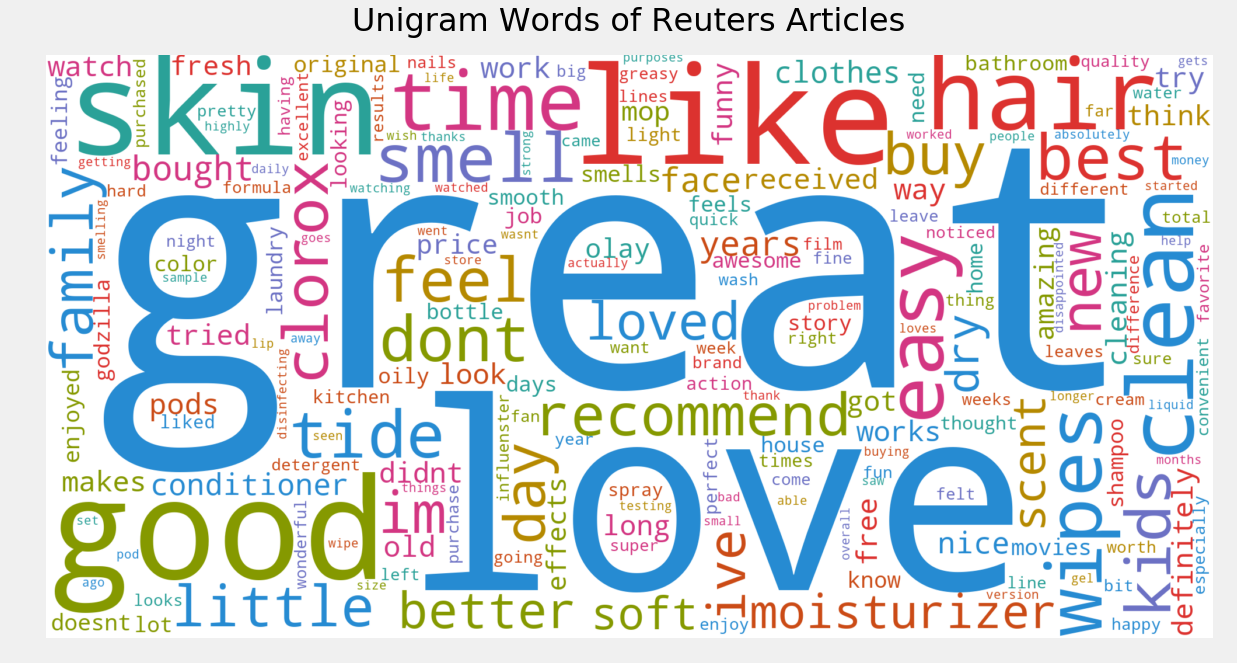

In [152]:
# Plot word cloud
def col_func(word, font_size, position, orientation, font_path, random_state):
    colors = ['#b58900', '#cb4b16', '#dc322f', '#d33682', '#6c71c4',
              '#268bd2', '#2aa198', '#859900']
    return random.choice(colors)
fd = {
    'fontsize': '32',
    'fontweight' : 'normal',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center',
}
wc = WordCloud(width=2000, height=1000, collocations=False,
               background_color="white",
               color_func=col_func,
               max_words=200,
               random_state=np.random.randint(1, 8)) .generate_from_frequencies(article_unigrams)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
ax.set_title("Unigram Words of Reuters Articles", pad=24, fontdict=fd)
plt.show()

# Most popular product that shoppers have purchased and the top rated comments 

In [282]:
top_products=df[['name','reviews.rating','reviews.text','reviews.title','reviews.didPurchase']][df['reviews.rating']>3]
top_products.head()

,name,reviews.rating,reviews.text,reviews.title,reviews.didPurchase
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,Just Awesome,NaN
1,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,Good,True
2,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,Good,True
20,K-Y Love Sensuality Pleasure Gel,4,I noticed this product on clearance at a store...,We love it!,False
21,K-Y Love Sensuality Pleasure Gel,4,I used this product a couple of times since i ...,good times,False


In [284]:
import plotly.express as px
top10_products = pd.DataFrame(top_products.groupby(by='name')['reviews.rating'].count().nlargest(10).sort_values(ascending = True))
fig = px.bar(top10_products, x = 'reviews.rating', y = top10_products.index, height = 600, color = 'reviews.rating', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'Top 10 product based on rating greater than 3')
fig.show()

In [281]:
#most popular product
top_prod_ = pd.DataFrame(top_products.groupby(by='name')['reviews.rating'].count().nlargest(1).sort_values(ascending = False))
top_prod_

,reviews.rating
name,
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8508
